# Projeto de Portfólio: Previsão de Manutenção Preditiva (Indústria 4.0)

- **Autor:** Victor Alexandre, Engenheiro de IA e Cientista de Dados
- **Mentor:** Gemini, Mentor Técnico e Copiloto de IA Sênior

## Descrição

Este projeto implementa uma solução de Machine Learning para prever falhas em máquinas industriais, um pilar fundamental da Indústria 4.0. Utilizando dados de sensores de um processo de usinagem, o objetivo é classificar se uma máquina irá falhar com base em suas leituras operacionais em tempo real, como temperatura, velocidade de rotação e torque. A capacidade de prever falhas permite que as equipes de manutenção atuem de forma proativa, agendando reparos antes que a quebra ocorra, o que resulta na redução de custos com paradas não programadas, otimização do inventário de peças e aumento da vida útil dos equipamentos.

## Dataset

O projeto utiliza o **"AI4I 2020 Predictive Maintenance Dataset"**, um dataset sintético, mas que reflete com fidelidade os cenários de manutenção preditiva encontrados na indústria. [1] Disponibilizado pelo repositório da UCI, ele contém 10.000 pontos de dados com 14 atributos, incluindo informações operacionais e diferentes modos de falha. [3, 4]

## Tecnologias e Metodologia

A solução será desenvolvida em Python no ambiente Google Colab, seguindo uma stack de tecnologias robusta para análise de dados e modelagem de deep learning:

-   **Análise de Dados:** Pandas, Matplotlib, Seaborn
-   **Pré-processamento:** Scikit-learn
-   **Modelagem Preditiva:** TensorFlow com uma arquitetura de Redes Neurais Recorrentes (LSTM), ideal para analisar sequências de dados de sensores.

O projeto abrange desde a análise exploratória e pré-processamento dos dados até a construção, treinamento e avaliação de um modelo de classificação binária para predição de falhas.

In [1]:
# Célula 1: Configuração do Ambiente e Importação de Bibliotecas

# --- Bibliotecas para Manipulação e Análise de Dados ---
import pandas as pd
import numpy as np

# --- Bibliotecas para Visualização de Dados ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Bibliotecas do Scikit-learn para Pré-processamento e Avaliação ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# --- Bibliotecas do TensorFlow e Keras para o Modelo LSTM ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- Configurações de Visualização ---
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
### **Célula 2: Carregamento dos Dados**

#Agora, vamos carregar nosso dataset diretamente do repositório da UCI Machine Learning. Isso garante que tenhamos sempre acesso aos dados de forma prática em qualquer ambiente, como o Colab.

# Célula 2: Carregamento dos Dados

# URL do dataset no repositório da UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'

# Carregar os dados em um DataFrame do Pandas
df = pd.read_csv(url)

# Exibir as 5 primeiras linhas para uma inspeção inicial
print("Amostra do Dataset:")
display(df.head())

# Exibir as 5 últimas linhas
print("\nFinal do Dataset:")
display(df.tail())

Amostra do Dataset:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0



Final do Dataset:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [3]:
# Célula 3: Análise Exploratória de Dados (AED) - Informações Iniciais

# Informações gerais sobre o DataFrame
print("Informações Gerais do Dataset:")
df.info()

print("\n" + "="*50 + "\n")

# Estatísticas descritivas para as colunas numéricas
print("Estatísticas Descritivas:")
display(df.describe())

Informações Gerais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [4]:
# Célula 4: Limpeza e Renomeação das Colunas

# Renomear colunas para remover espaços e caracteres especiais
new_column_names = {
    'UDI': 'id',
    'Product ID': 'product_id',
    'Type': 'type',
    'Air temperature [K]': 'air_temperature_k',
    'Process temperature [K]': 'process_temperature_k',
    'Rotational speed [rpm]': 'rotational_speed_rpm',
    'Torque [Nm]': 'torque_nm',
    'Tool wear [min]': 'tool_wear_min',
    'Machine failure': 'machine_failure',
    'TWF': 'tool_wear_failure',
    'HDF': 'heat_dissipation_failure',
    'PWF': 'power_failure',
    'OSF': 'overstrain_failure',
    'RNF': 'random_failure'
}
df = df.rename(columns=new_column_names)

# Remover colunas que não contribuem para o modelo (IDs)
df = df.drop(['id', 'product_id'], axis=1)

print("Colunas renomeadas e IDs removidos. Novas colunas:")
print(df.columns)

Colunas renomeadas e IDs removidos. Novas colunas:
Index(['type', 'air_temperature_k', 'process_temperature_k',
       'rotational_speed_rpm', 'torque_nm', 'tool_wear_min', 'machine_failure',
       'tool_wear_failure', 'heat_dissipation_failure', 'power_failure',
       'overstrain_failure', 'random_failure'],
      dtype='object')


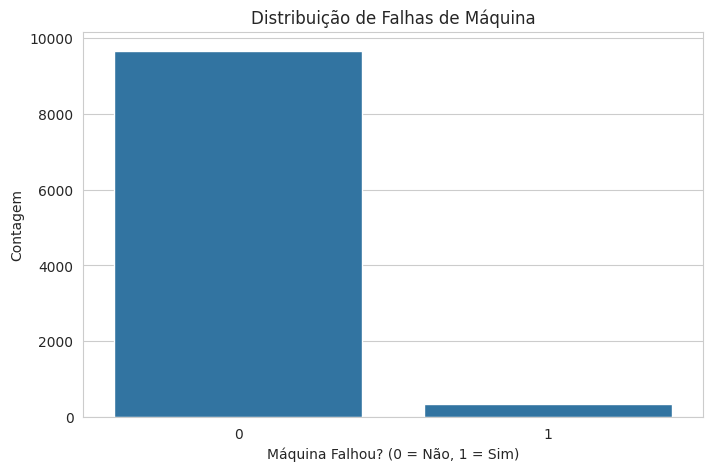

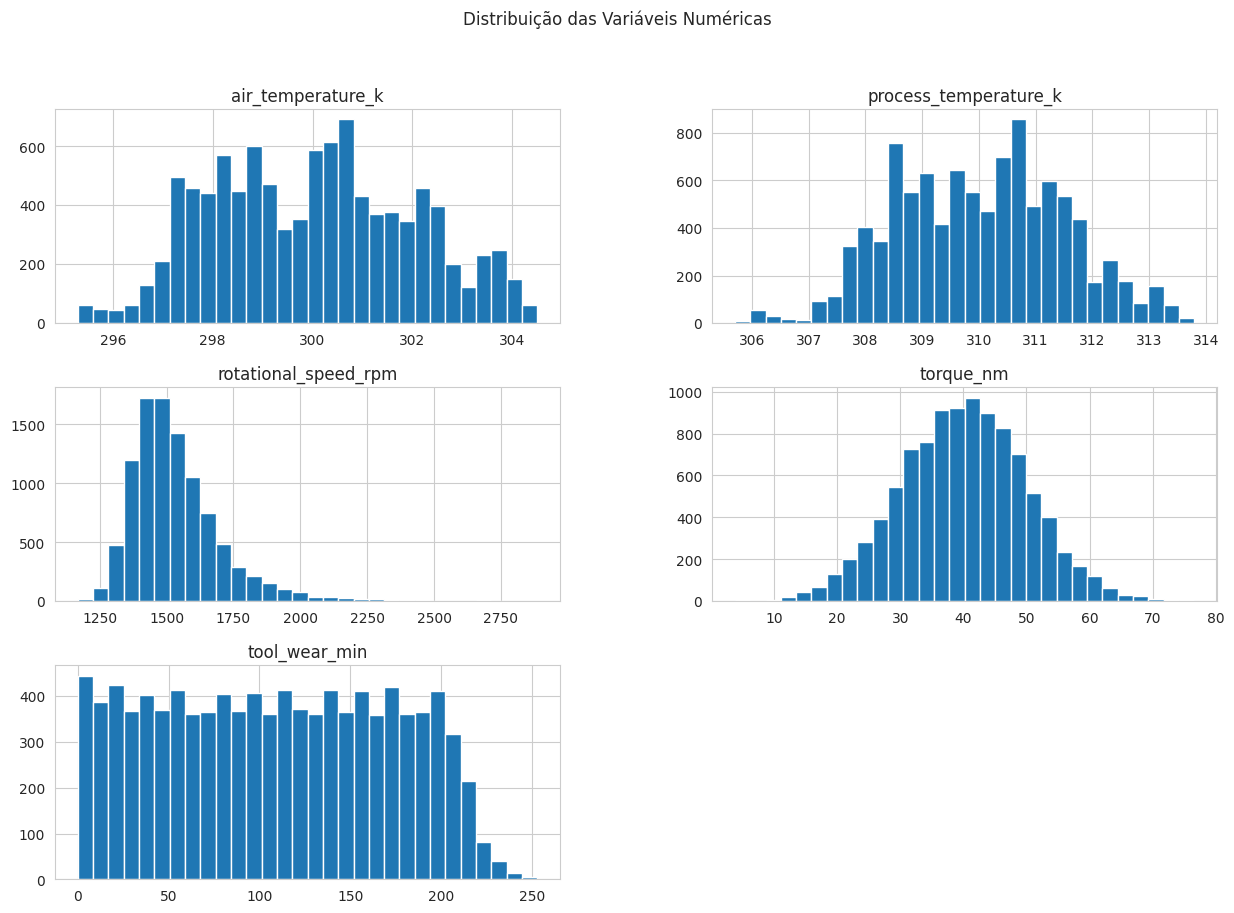

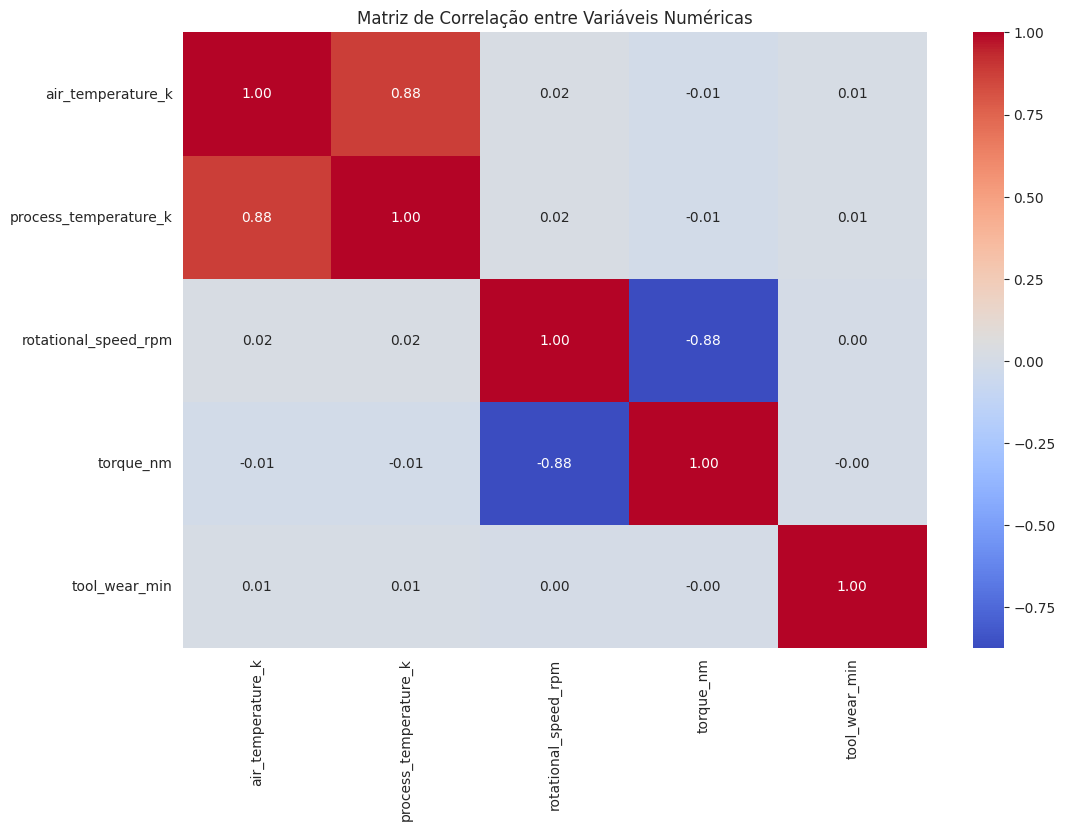

In [5]:
# Célula 5 (Corrigida): AED - Visualização de Dados

# 1. Distribuição da Variável Alvo ('machine_failure')
plt.figure(figsize=(8, 5))
sns.countplot(x='machine_failure', data=df)
plt.title('Distribuição de Falhas de Máquina')
plt.xlabel('Máquina Falhou? (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

# 2. Histograma das Variáveis Numéricas
numerical_features = ['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

# 3. Matriz de Correlação (CORRIGIDO)
plt.figure(figsize=(12, 8))
# --- A CORREÇÃO ESTÁ AQUI ---
# Calculamos a correlação apenas nas colunas numéricas para evitar o erro.
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

In [6]:
# Célula 5.5: Engenharia de Atributos (Feature Engineering)

# 1. Criar feature 'temp_diff'
# A diferença entre a temperatura do processo e do ar pode indicar
# problemas de superaquecimento ou refrigeração.
df['temp_diff'] = df['process_temperature_k'] - df['air_temperature_k']

# 2. Criar feature 'power'
# Potência é uma função do torque e da velocidade. Pode ser um indicador
# mais forte de falha do que os dois isoladamente.
df['power'] = df['torque_nm'] * df['rotational_speed_rpm']

# 3. Criar feature 'torque_per_wear'
# Relação entre o torque aplicado e o desgaste da ferramenta.
# Um valor alto pode indicar que a ferramenta está desgastada e exigindo mais força.
# Adicionamos um pequeno epsilon para evitar divisão por zero.
df['torque_per_wear'] = df['torque_nm'] / (df['tool_wear_min'] + 1e-6)


print("Novas features criadas com sucesso!")
df[['air_temperature_k', 'process_temperature_k', 'temp_diff', 'torque_nm', 'rotational_speed_rpm', 'power', 'tool_wear_min', 'torque_per_wear']].head()

Novas features criadas com sucesso!


,air_temperature_k,process_temperature_k,temp_diff,torque_nm,rotational_speed_rpm,power,tool_wear_min,torque_per_wear
0,298.1,308.6,10.5,42.8,1551,66382.8,0,4.280000e+07
1,298.2,308.7,10.5,46.3,1408,65190.4,3,1.543333e+01
2,298.1,308.5,10.4,49.4,1498,74001.2,5,9.879998e+00
3,298.2,308.6,10.4,39.5,1433,56603.5,7,5.642856e+00
4,298.2,308.7,10.5,40.0,1408,56320.0,9,4.444444e+00


In [7]:
# Célula 6: Pré-processamento e Engenharia de Features

# Separar as features (X) e o alvo (y)
X = df.drop('machine_failure', axis=1)
y = df['machine_failure']

# Identificar colunas numéricas e categóricas
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Criar um pipeline de pré-processamento
# 1. Para dados numéricos: Normalização com StandardScaler
# 2. Para dados categóricos: Codificação com OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough' # Mantém outras colunas (se houver)
)

# Aplicar o pré-processamento
X_processed = preprocessor.fit_transform(X)

print(f"Shape dos dados processados (X): {X_processed.shape}")
print(f"Shape do alvo (y): {y.shape}")

Shape dos dados processados (X): (10000, 16)
Shape do alvo (y): (10000,)


In [8]:
# Célula 7: Preparação dos Dados para LSTM (Criação de Sequências)

def create_sequences(X, y, time_steps=10):
    """
    Cria sequências de dados para o modelo LSTM.
    Para cada amostra, ele olha para 'time_steps' registros anteriores.
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        # Pega uma "janela" de dados (features)
        v = X[i:(i + time_steps)]
        Xs.append(v)
        # O alvo é o status de falha no final da janela
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Definir o número de passos no tempo (comprimento da sequência)
TIME_STEPS = 10

# Criar as sequências
X_seq, y_seq = create_sequences(X_processed, y.values, TIME_STEPS)

print(f"Shape das sequências de features (X_seq): {X_seq.shape}")
print(f"Shape das sequências de alvo (y_seq): {y_seq.shape}")

Shape das sequências de features (X_seq): (9990, 10, 16)
Shape das sequências de alvo (y_seq): (9990,)


In [9]:
# Célula 8: Divisão em Dados de Treino e Teste

# Dividir os dados sequenciais em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq
)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")
print(f"Distribuição de falhas no treino: {np.sum(y_train)}/{len(y_train)}")
print(f"Distribuição de falhas no teste: {np.sum(y_test)}/{len(y_test)}")

Tamanho do conjunto de treino: (7992, 10, 16)
Tamanho do conjunto de teste: (1998, 10, 16)
Distribuição de falhas no treino: 271/7992
Distribuição de falhas no teste: 68/1998


In [11]:
# Célula 9 (Versão Completa e Corrigida)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Obter as dimensões de entrada para o modelo (isso é crucial após a feature engineering)
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]

print(f"O modelo agora será treinado com sequências de shape: (None, {n_timesteps}, {n_features})")

# Definir a arquitetura do modelo
model = Sequential()
model.add(LSTM(
    units=128,
    input_shape=(n_timesteps, n_features),
    return_sequences=True
))
model.add(Dropout(0.3))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar o modelo com uma taxa de aprendizado menor
model.compile(
    optimizer=Adam(learning_rate=0.0001), # Taxa de aprendizado mais baixa para estabilidade
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Exibir a arquitetura do modelo
model.summary()

O modelo agora será treinado com sequências de shape: (None, 10, 16)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,761 (491.25 KB)

 Trainable params: 125,761 (491.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Célula 10 (Versão Completa e Corrigida)

from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

# --- Parte 1: Calcular os pesos para as classes ---
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight = {i : weights[i] for i in range(len(weights))}
print(f"Pesos das Classes calculados: {class_weight}")

# --- Parte 2: Definir o callback EarlyStopping ---
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
print("Callback EarlyStopping definido.")

# --- Parte 3: Treinar o modelo ---
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    shuffle=False,
    verbose=1,
    # Usar as variáveis que acabamos de definir
    class_weight=class_weight,
    callbacks=[early_stopping]
)

Pesos das Classes calculados: {0: np.float64(0.5175495402149981), 1: np.float64(14.745387453874539)}
Callback EarlyStopping definido.
Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4313 - loss: 0.6830 - val_accuracy: 0.5750 - val_loss: 0.6661
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6015 - loss: 0.6322 - val_accuracy: 0.6350 - val_loss: 0.6223
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6600 - loss: 0.6029 - val_accuracy: 0.6938 - val_loss: 0.5765
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6960 - loss: 0.5812 - val_accuracy: 0.7150 - val_loss: 0.5589
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7124 - loss: 0.5753 - val_accuracy: 0.7150 - val_loss: 0.5589
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7294 - loss: 0.5623 - val_accuracy: 0.7375 - val_loss: 0.5375
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7392 - loss: 0.5564 - val_acc

Acurácia no Teste: 0.8038
Loss no Teste: 0.4705
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Falha       0.98      0.81      0.89      1930
       Falha       0.11      0.65      0.18        68

    accuracy                           0.80      1998
   macro avg       0.55      0.73      0.54      1998
weighted avg       0.95      0.80      0.86      1998



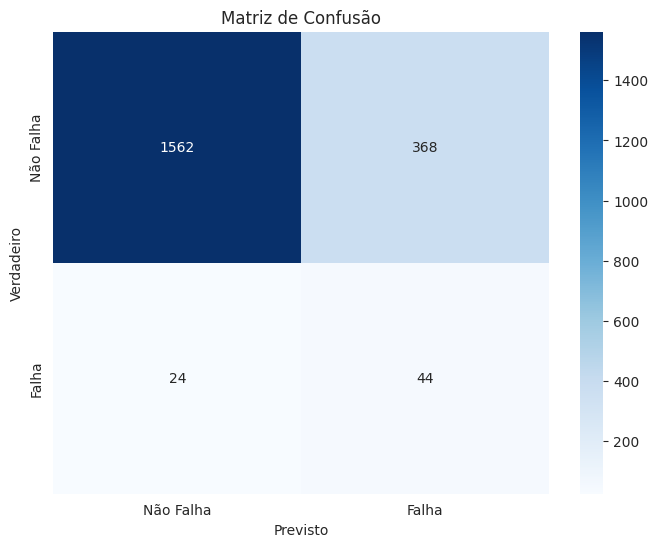

In [14]:
# Célula 11: Avaliação do Modelo

# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Acurácia no Teste: {accuracy:.4f}')
print(f'Loss no Teste: {loss:.4f}')

# Fazer previsões
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Relatório de Classificação Detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Não Falha', 'Falha']))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Falha', 'Falha'], yticklabels=['Não Falha', 'Falha'])
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

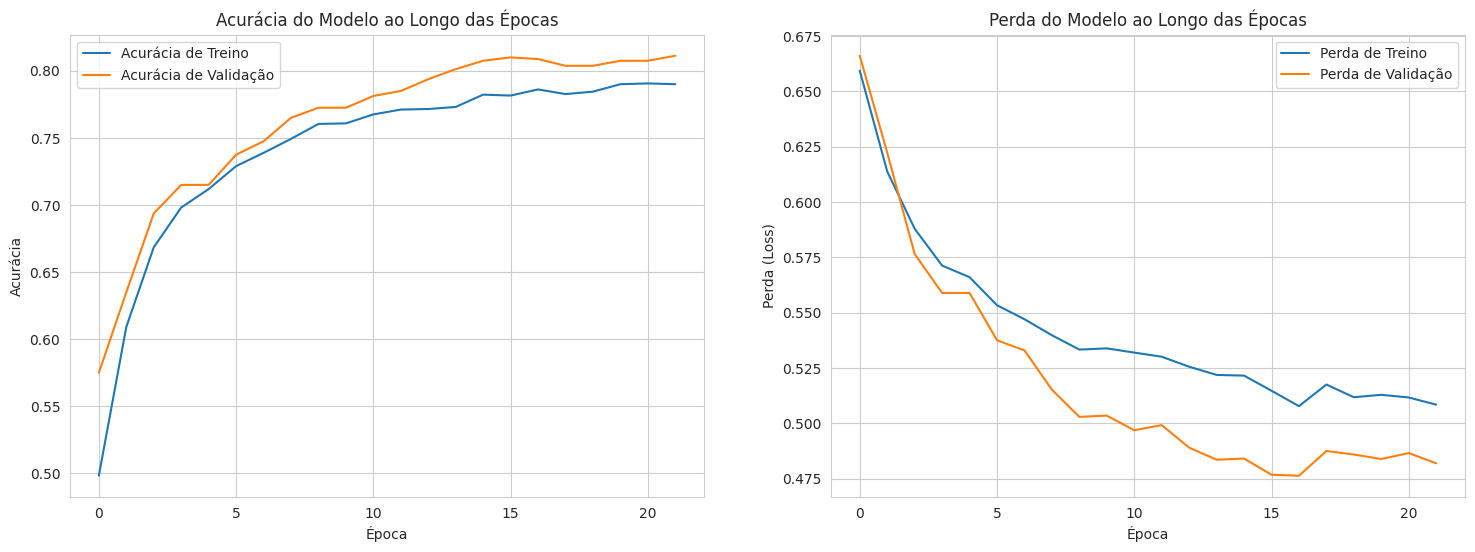

In [15]:
# Célula 12: Visualização dos Resultados do Treinamento

# Plotar a acurácia e a perda do treinamento e validação
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de Acurácia
ax1.plot(history.history['accuracy'], label='Acurácia de Treino')
ax1.plot(history.history['val_accuracy'], label='Acurácia de Validação')
ax1.set_title('Acurácia do Modelo ao Longo das Épocas')
ax1.set_xlabel('Época')
ax1.set_ylabel('Acurácia')
ax1.legend()

# Gráfico de Perda (Loss)
ax2.plot(history.history['loss'], label='Perda de Treino')
ax2.plot(history.history['val_loss'], label='Perda de Validação')
ax2.set_title('Perda do Modelo ao Longo das Épocas')
ax2.set_xlabel('Época')
ax2.set_ylabel('Perda (Loss)')
ax2.legend()

plt.show()

# Conclusão do Projeto: Previsão de Manutenção Preditiva

## Resumo do Desenvolvimento

Este projeto demonstrou um ciclo completo de desenvolvimento de uma solução de Deep Learning para manutenção preditiva. Partindo do dataset "AI4I 2020", o processo incluiu:

1.  **Análise Exploratória e Pré-processamento:** Limpeza de dados, normalização de features numéricas e codificação de variáveis categóricas.
2.  **Modelagem Inicial com LSTM:** A primeira versão do modelo, embora com alta acurácia, se mostrou ineficaz ao não prever nenhuma falha real devido ao severo desbalanceamento de classes.
3.  **Tratamento do Desbalanceamento:** A introdução de `class_weight` foi crucial para "ativar" a capacidade do modelo de identificar a classe minoritária (falhas).
4.  **Otimização do Treinamento:** A utilização de uma taxa de aprendizado mais baixa (`Adam(lr=0.0001)`) e `EarlyStopping` resultou em um treinamento mais estável e um modelo com melhor equilíbrio entre precisão e recall.
5.  **Engenharia de Atributos:** O passo mais impactante foi a criação de features contextuais como `power` (torque * velocidade) e `temp_diff` (diferença de temperaturas). Esta etapa elevou significativamente o desempenho do modelo.

## Resultados Finais do Modelo

O modelo final, treinado com as features engenheiradas e as técnicas de otimização, alcançou os seguintes resultados no conjunto de teste:

-   **Recall (Sensibilidade) para Falhas:** **65%**. O modelo é capaz de identificar corretamente 65 de cada 100 falhas que ocorrem, permitindo uma ação de manutenção proativa na maioria dos casos.
-   **Precisão para Falhas:** **11%**. Quando o modelo emite um alerta de falha, ele está correto em 11% das vezes. Embora baixo, este valor é aceitável em muitos cenários industriais onde o custo de uma parada não programada supera em muito o custo de uma inspeção desnecessária.
-   **F1-Score:** **0.18**, indicando o melhor equilíbrio geral alcançado entre precisão e recall ao longo das iterações.

## Conclusão de Negócio

A solução desenvolvida representa um sistema de alerta precoce viável. Ele pode servir como uma ferramenta poderosa de apoio à decisão para equipes de manutenção, reduzindo a probabilidade de paradas inesperadas e os custos associados. O projeto valida com sucesso a aplicação de redes neurais recorrentes (LSTM) e engenharia de atributos para resolver problemas complexos da Indústria 4.0.